In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [12]:
#setup 
k = 10                 #number of arms in the bandit
steps = 10000          #number of time steps (plays)
epsilon = 0.1          #exploration rate
runs = 2000            #number of experiments (averaging)
alpha = 0.1            #fixed stepsize

In [13]:
#Bandit class
class Bandit:
    def __init__(self):
        self.true_values = np.random.randn(10)   #generates the 10 random number from sample N(0,1)

    def get_reward(self,action):
        #get a true value for this action
        return self.true_values[action] + np.random.randn()
        

In [14]:
#Nonstationary bandit
class NonStationaryBandit:
    def __init__(self):
        #all starts equal
        self.true_values = np.zeros(10)

    
    def random_walk(self):       
        self.true_values += np.random.randn(10)*0.01
    
    def get_reward(self,action):
        return self.true_values[action] + np.random.randn()

In [15]:
#E-greedy agent class
class EpsilonGreedyAgent:
    def __init__(self, epsilon):
        self.epsilon = epsilon
        self.Q = np.zeros(10)  #estimated action values all starts at 0
        self.N = np.zeros(10)  #action counts all starts at 0

    def select_action(self):
        #exploration part
        if np.random.rand() < self.epsilon:
            return np.random.randint(10)
        #exploitation part
        else:
            return np.argmax(self.Q)

    def update(self, action, reward):
        self.N[action] += 1
        self.Q[action] = self.Q[action] + (reward-self.Q[action]) / self.N[action]

In [16]:
#E-greedy agent class with constant alpha
class EpsilonGreedyAlphaAgent:
    def __init__(self, epsilon, alpha=0.1):
        self.epsilon = epsilon
        self.alpha = alpha
        self.Q = np.zeros(10)  #estimated action values all starts at 0

    def select_action(self):
        #exploration part
        if np.random.rand() < self.epsilon:
            return np.random.randint(10)
        #exploitation part
        else:
            return np.argmax(self.Q)

    def update(self, action, reward):
        self.Q[action] = self.Q[action] + self.alpha*(reward-self.Q[action])

In [17]:
def run_testbed_stationary(num_problems=2000, num_steps=1000, epsilon=epsilon):
    #creating array to store sum of rewards at each time step.
    total_rewards = np.zeros(num_steps)

    for problem in range(num_problems):
        #print progress after every 200 problems
        if (problem+1)%200 == 0:
            print(f"{problem+1} problems completed out of {num_problems}")

        #create a new bandit problem
        bandit = NonStationaryBandit()

        #create a new agent that knows nothing initially
        agent = EpsilonGreedyAgent(epsilon = epsilon)

        #run this problem num_steps times
        for step in range(num_steps):
            
            #agent selects an action using e-greedy method
            action = agent.select_action()

            #bandit gives the reward for that action
            reward = bandit.get_reward(action)
            
            #agent updates it's estimates based on the reward
            agent.update(action, reward)

            #recording this reward
            total_rewards[step] += reward
            
    total_rewards /= num_problems
    return total_rewards   

In [18]:
def run_testbed_nonstationary(num_problems=2000, num_steps=1000, epsilon=epsilon):
    #creating array to store sum of rewards at each time step.
    total_rewards = np.zeros(num_steps)

    for problem in range(num_problems):
        #print progress after every 200 problems
        if (problem+1)%200 == 0:
            print(f"{problem+1} problems completed out of {num_problems}")

        #create a new bandit problem
        bandit = NonStationaryBandit()

        #create a new agent that knows nothing initially
        agent = EpsilonGreedyAlphaAgent(epsilon=epsilon)

        #run this problem num_steps times
        for step in range(num_steps):

            #non-stationary expected result
            bandit.random_walk()
            
            #agent selects an action using e-greedy method
            action = agent.select_action()

            #bandit gives the reward for that action
            reward = bandit.get_reward(action)
            
            #agent updates it's estimates based on the reward
            agent.update(action, reward)

            #recording this reward
            total_rewards[step] += reward
            
    total_rewards /= num_problems
    return total_rewards 

In [26]:
if __name__ == "__main__":
    print("starting 10 arm bandit testbed......")
    start_time = time.time()
    avg_rewards1 = run_testbed_stationary(num_problems=2000, num_steps=10000, epsilon=0.1) 
    end_time = time.time()
    execution_time_1 = end_time-start_time
    print(f"it took {execution_time_1} seconds to complete first execution")
    avg_rewards2 = run_testbed_nonstationary(num_problems=2000, num_steps=10000, epsilon=0.1)
    final_end_time = time.time()
    execution_time_2 = final_end_time - end_time
    execution_time_3 = final_end_time - start_time
    print(f"it took {execution_time_2} seconds to complete second execution")
    print(f"it took {execution_time_3} seconds to complete full execution")
    print("simulation completed!.......")

starting 10 arm bandit testbed......
200 problems completed out of 2000
400 problems completed out of 2000
600 problems completed out of 2000
800 problems completed out of 2000
1000 problems completed out of 2000
1200 problems completed out of 2000
1400 problems completed out of 2000
1600 problems completed out of 2000
1800 problems completed out of 2000
2000 problems completed out of 2000
it took 148.79376339912415 seconds to complete first execution
200 problems completed out of 2000
400 problems completed out of 2000
600 problems completed out of 2000
800 problems completed out of 2000
1000 problems completed out of 2000
1200 problems completed out of 2000
1400 problems completed out of 2000
1600 problems completed out of 2000
1800 problems completed out of 2000
2000 problems completed out of 2000
it took 259.2342472076416 seconds to complete second execution
it took 408.02801060676575 seconds to complete full execution
simulation completed!.......


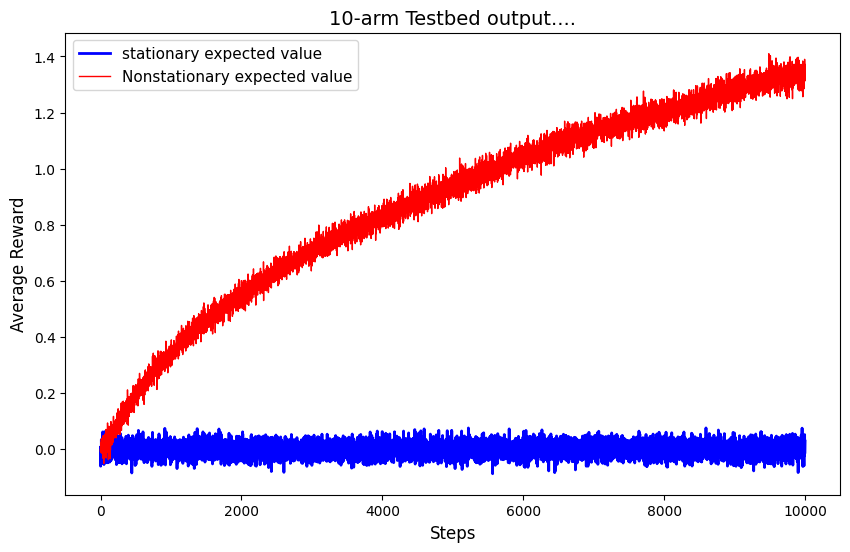

In [27]:
    #plotting the results
    plt.figure(figsize=(10,6))
    plt.plot(avg_rewards1, linewidth=2, label='stationary expected value', color='blue')
    plt.plot(avg_rewards2, linewidth=1, label='Nonstationary expected value', color='red')
    plt.xlabel('Steps', fontsize=12)
    plt.ylabel('Average Reward', fontsize=12)
    plt.title('10-arm Testbed output....', fontsize=14)
    plt.legend(fontsize=11)